In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [104]:
member = pd.read_excel('Member.xlsx')
utilization = pd.read_excel('Utilization.xlsx')

# Member Dataset Exploration


In [105]:
member.head()

,MEMBER_ID,PCP_POOL,AIDCAT,SEX,AGE,REGION,LANGUAGE,RACE_ETHNICITY,ASTHMA_DENOMINATOR,ASTHMA_NUMERATOR
0,30001062600,SM,DISABLED,F,71,SOUTHERN,ENGLISH,WHITE,1,0
1,30001091800,NC,DISABLED,F,63,SOUTHERN,SPANISH,HISPANIC,1,0
2,30002321300,SCAH,MCE,M,56,SOUTHERN,ENGLISH,WHITE,1,1
3,30003427200,SM,FAMILY,F,27,SOUTHERN,ENGLISH,BLACK,1,0
4,30004005500,YOSM,MCE,M,29,SOUTHERN,ENGLISH,BLACK,1,0


In [106]:
member.shape

(403, 10)

In [107]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MEMBER_ID            403 non-null    int64 
 1   PCP_POOL             403 non-null    object
 2   AIDCAT               403 non-null    object
 3   SEX                  403 non-null    object
 4   AGE                  403 non-null    int64 
 5   REGION               403 non-null    object
 6   LANGUAGE             403 non-null    object
 7   RACE_ETHNICITY       403 non-null    object
 8   ASTHMA_DENOMINATOR   403 non-null    int64 
 9   ASTHMA_NUMERATOR     403 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 31.6+ KB


In [108]:
member.describe()

,MEMBER_ID,AGE,ASTHMA_DENOMINATOR,ASTHMA_NUMERATOR
count,4.030000e+02,403.000000,403.0,403.000000
mean,3.008027e+10,31.431762,1.0,0.347395
std,3.557009e+07,20.761431,0.0,0.476734
min,3.000106e+10,0.000000,1.0,0.000000
25%,3.005268e+10,13.500000,1.0,0.000000
50%,3.007772e+10,31.000000,1.0,0.000000
75%,3.011111e+10,47.500000,1.0,1.000000
max,3.013896e+10,86.000000,1.0,1.000000


# Utilization Dataset Exploration

In [109]:
utilization.head()

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST
0,30001062600,191480390663,2019-04-18,J9621,ACUTE AND CHRONIC RESPIRATORY FAILURE WITH HYP...,0.00
1,30001091800,190737712251,2019-03-09,B349,"VIRAL INFECTION, UNSPECIFIED",260.46
2,30002321300,191577705710,2019-05-28,R079,"CHEST PAIN, UNSPECIFIED",286.82
3,30003427200,182557711861,2018-09-06,O200,THREATENED ABORTION,232.82
4,30004005500,182277705600,2018-07-18,E1165,TYPE 2 DIABETES MELLITUS WITH HYPERGLYCEMIA,196.67


In [110]:
utilization.shape

(388, 6)

In [111]:
utilization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MEMBER_ID              388 non-null    int64         
 1   CLAIM_ID               388 non-null    int64         
 2   ADMIT_DATE             388 non-null    datetime64[ns]
 3   DIAGNOSIS_CODE         387 non-null    object        
 4   DIAGNOSIS_DESCRIPTION  385 non-null    object        
 5   COST                   388 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 18.3+ KB


In [112]:
utilization.describe()

,MEMBER_ID,CLAIM_ID,COST
count,3.880000e+02,3.880000e+02,388.000000
mean,3.008010e+10,1.848746e+11,235.799021
std,3.512986e+07,4.393901e+09,420.262519
min,3.000106e+10,1.801677e+11,-333.430000
25%,3.005331e+10,1.812702e+11,81.840000
50%,3.007771e+10,1.828241e+11,124.310000
75%,3.011018e+10,1.904377e+11,241.262500
max,3.013896e+10,1.918277e+11,5307.710000


# Data Quality Check

In [113]:
# 400 out of 403 member IDs are unique
len(pd.unique(member['MEMBER_ID']))

400

In [114]:
# The duplicate member IDs
member[member['MEMBER_ID'].duplicated(keep=False)].sort_values(by='MEMBER_ID', ascending=True)

,MEMBER_ID,PCP_POOL,AIDCAT,SEX,AGE,REGION,LANGUAGE,RACE_ETHNICITY,ASTHMA_DENOMINATOR,ASTHMA_NUMERATOR
288,30106818500,RUCM,FAMILY,F,10,NORTHERN,ENGLISH,WHITE,1,1
402,30106818500,RUCM,FAMILY,F,10,NORTHERN,ENGLISH,WHITE,1,1
329,30121443500,LKHO,MCE,M,65,SOUTHERN,ENGLISH,WHITE,1,0
401,30121443500,LKHO,MCE,M,65,SOUTHERN,ENGLISH,WHITE,1,0
375,30131426800,LKHO,FAMILY,F,0,SOUTHERN,SPANISH,HISPANIC,1,0
400,30131426800,LKHO,FAMILY,F,0,SOUTHERN,SPANISH,HISPANIC,1,0


In [115]:
# 385 out of 388 claim IDs are unique
len(pd.unique(utilization['CLAIM_ID']))

385

In [116]:
# The duplicate claim IDs
utilization[utilization['CLAIM_ID'].duplicated(keep=False)].sort_values(by='MEMBER_ID', ascending=True)

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST
7,30010333500,182147700854,2018-07-18,H5712,"OCULAR PAIN, LEFT EYE",92.28
385,30010333500,182147700854,1957-07-18,H5712,"OCULAR PAIN, LEFT EYE",0.00
338,30125296700,181717700612,2018-06-12,F10239,"ALCOHOL DEPENDENCE WITH WITHDRAWAL, UNSPECIFIED",716.05
386,30125296700,181717700612,2018-06-12,NaN,NaN,716.05
370,30133120400,183527709208,2018-12-09,J069,"ACUTE UPPER RESPIRATORY INFECTION, UNSPECIFIED",81.84
387,30133120400,183527709208,2018-12-09,J069,"ACUTE UPPER RESPIRATORY INFECTION, UNSPECIFIED",-333.43


In [117]:
negative_age_count = member[member['AGE'] < 0].shape[0]
print("Number of negative age values:", negative_age_count)

Number of negative age values: 0


In [118]:
outlier_age_count = member[member['AGE'] > 100].shape[0]
print("Number of outlier age values:", outlier_age_count)

Number of outlier age values: 0


In [119]:
negative_cost_count = utilization[utilization['COST'] < 0].shape[0]
print("Number of negative cost values:", negative_cost_count)

Number of negative cost values: 1


In [120]:
#There is 1 claim with a negative cost value
utilization[utilization['COST'] < 0]

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST
387,30133120400,183527709208,2018-12-09,J069,"ACUTE UPPER RESPIRATORY INFECTION, UNSPECIFIED",-333.43


In [121]:
utilization[utilization['COST'] > 3000]

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST
270,30104499700,182437716724,2018-08-23,R339,"RETENTION OF URINE, UNSPECIFIED",5307.71
314,30120281700,190310391699,2019-01-17,L299,"PRURITUS, UNSPECIFIED",4103.60


In [122]:
#There is 1 claim with a missing diagnosis code
utilization[utilization['DIAGNOSIS_CODE'].isnull()]

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST
386,30125296700,181717700612,2018-06-12,NaN,NaN,716.05


In [123]:
# There are 3 claims with missing diagnosis descriptions, 2 of which do have diagnosis codes.
utilization[utilization['DIAGNOSIS_DESCRIPTION'].isnull()]

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST
47,30040023500,191370390718,2019-04-30,K3530,NaN,1121.19
295,30113678500,190507704536,2019-02-12,M7910,NaN,111.61
386,30125296700,181717700612,2018-06-12,NaN,NaN,716.05


# Data Visualization Quality Check

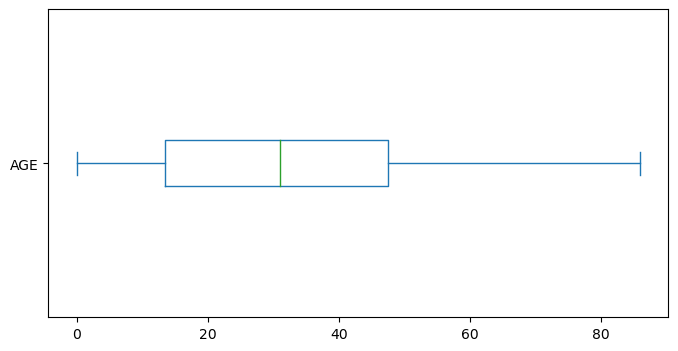

In [124]:
memberbox = member['AGE'].plot(kind='box', vert=False, figsize=(8,4))

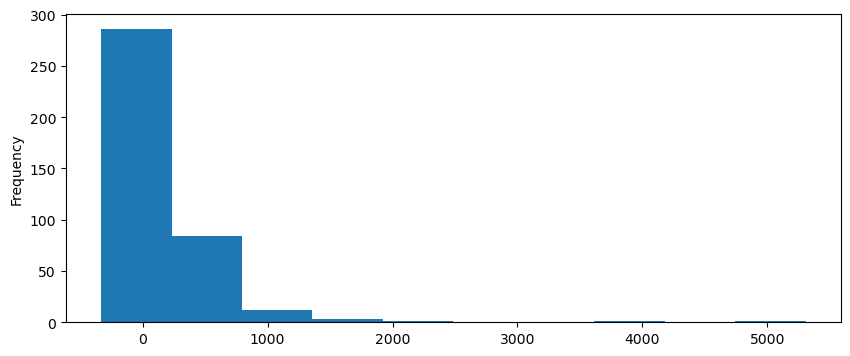

In [125]:
costden = utilization['COST'].plot(kind='hist', figsize=(10,4))

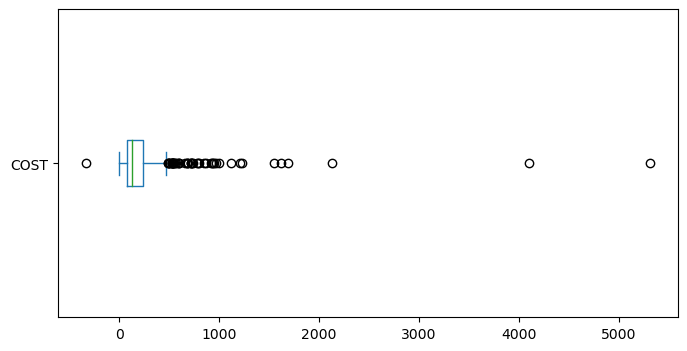

In [126]:
costbox = utilization['COST'].plot(kind='box', vert=False, figsize=(8,4))

Text(0.5, 1.0, 'Distribution of PCP Pool')

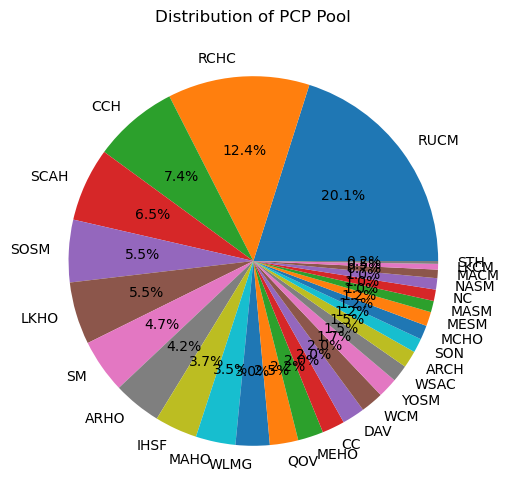

In [127]:
plt.figure(figsize=(6, 6))
pcppool_counts = member['PCP_POOL'].value_counts()
plt.pie(pcppool_counts, labels=pcppool_counts.index, autopct='%1.1f%%')
plt.title('Distribution of PCP Pool')

Text(0.5, 1.0, 'Distribution of AIDCAT')

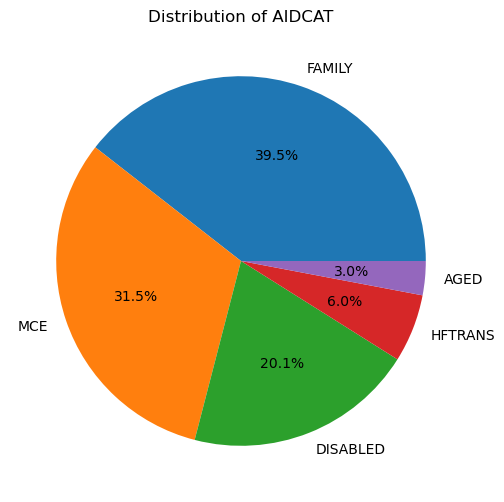

In [128]:
plt.figure(figsize=(6, 6))
aidcat_counts = member['AIDCAT'].value_counts()
plt.pie(aidcat_counts, labels=aidcat_counts.index, autopct='%1.1f%%')
plt.title('Distribution of AIDCAT')

Text(0.5, 1.0, 'Distribution of Sex')

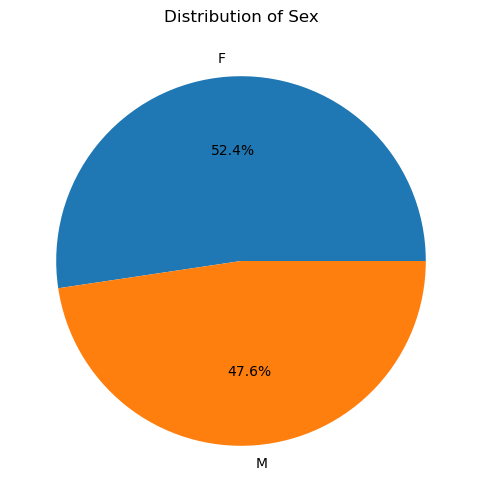

In [129]:
plt.figure(figsize=(6, 6))
sex_counts = member['SEX'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')

Text(0.5, 1.0, 'Distribution of Region')

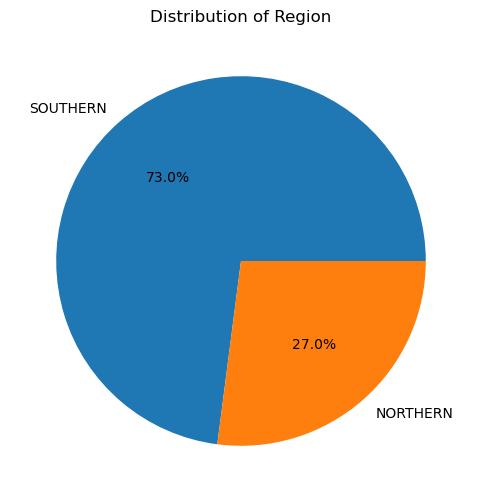

In [143]:
plt.figure(figsize=(6, 6))
region_counts = member['REGION'].value_counts()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Region')

Text(0.5, 1.0, 'Distribution of Ethnicity')

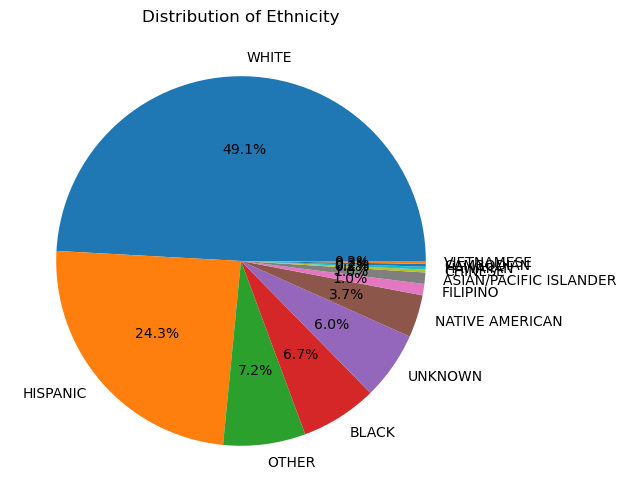

In [131]:
plt.figure(figsize=(6, 6))
ethnicity_counts = member['RACE_ETHNICITY'].value_counts()
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ethnicity')

Text(0.5, 1.0, 'Distribution of Languages')

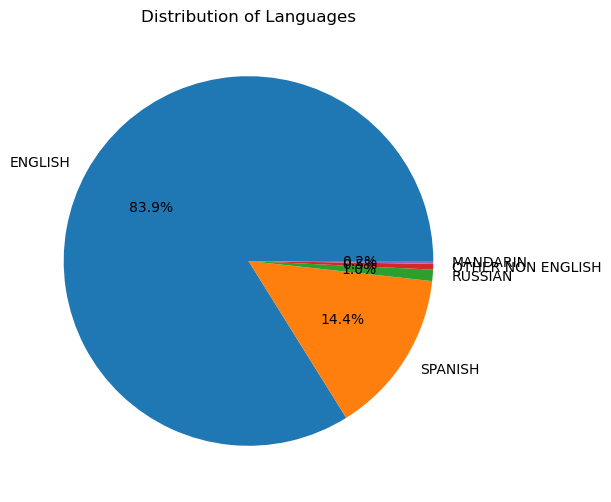

In [132]:
plt.figure(figsize=(6, 6))
language_counts = member['LANGUAGE'].value_counts()
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Languages')

# Question 2: Merging datasets

In [133]:
merged_data = pd.merge(utilization, member, on='MEMBER_ID', how='left')

In [134]:
merged_data.head()

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST,PCP_POOL,AIDCAT,SEX,AGE,REGION,LANGUAGE,RACE_ETHNICITY,ASTHMA_DENOMINATOR,ASTHMA_NUMERATOR
0,30001062600,191480390663,2019-04-18,J9621,ACUTE AND CHRONIC RESPIRATORY FAILURE WITH HYP...,0.00,SM,DISABLED,F,71,SOUTHERN,ENGLISH,WHITE,1,0
1,30001091800,190737712251,2019-03-09,B349,"VIRAL INFECTION, UNSPECIFIED",260.46,NC,DISABLED,F,63,SOUTHERN,SPANISH,HISPANIC,1,0
2,30002321300,191577705710,2019-05-28,R079,"CHEST PAIN, UNSPECIFIED",286.82,SCAH,MCE,M,56,SOUTHERN,ENGLISH,WHITE,1,1
3,30003427200,182557711861,2018-09-06,O200,THREATENED ABORTION,232.82,SM,FAMILY,F,27,SOUTHERN,ENGLISH,BLACK,1,0
4,30004005500,182277705600,2018-07-18,E1165,TYPE 2 DIABETES MELLITUS WITH HYPERGLYCEMIA,196.67,YOSM,MCE,M,29,SOUTHERN,ENGLISH,BLACK,1,0


# Question 3: Grouping members by age group

In [135]:
# Create bins for the age groups, the last bin edge represents '65 and over'
age_bins = [0, 20, 64, float('inf')]

# Define the labels for the age groups
age_labels = ['0-20', '21-64', '65 and over']

#Create new column with the defined bin and labels
merged_data['AGE_GROUP'] = pd.cut(merged_data['AGE'], bins=age_bins, labels=age_labels, right=False)

merged_data.head()

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST,PCP_POOL,AIDCAT,SEX,AGE,REGION,LANGUAGE,RACE_ETHNICITY,ASTHMA_DENOMINATOR,ASTHMA_NUMERATOR,AGE_GROUP
0,30001062600,191480390663,2019-04-18,J9621,ACUTE AND CHRONIC RESPIRATORY FAILURE WITH HYP...,0.00,SM,DISABLED,F,71,SOUTHERN,ENGLISH,WHITE,1,0,65 and over
1,30001091800,190737712251,2019-03-09,B349,"VIRAL INFECTION, UNSPECIFIED",260.46,NC,DISABLED,F,63,SOUTHERN,SPANISH,HISPANIC,1,0,21-64
2,30002321300,191577705710,2019-05-28,R079,"CHEST PAIN, UNSPECIFIED",286.82,SCAH,MCE,M,56,SOUTHERN,ENGLISH,WHITE,1,1,21-64
3,30003427200,182557711861,2018-09-06,O200,THREATENED ABORTION,232.82,SM,FAMILY,F,27,SOUTHERN,ENGLISH,BLACK,1,0,21-64
4,30004005500,182277705600,2018-07-18,E1165,TYPE 2 DIABETES MELLITUS WITH HYPERGLYCEMIA,196.67,YOSM,MCE,M,29,SOUTHERN,ENGLISH,BLACK,1,0,21-64


# Question 4: Filtering the Original Merged Dataset

In [136]:
# Create a new data set for year 2018
df_2018 = merged_data[merged_data['ADMIT_DATE'].dt.year == 2018]

# Create a new data set that excludes records with PCP_POOL starting with "KAI" or ending with "SM"
df_filtered = df_2018[~df_2018['PCP_POOL'].str.startswith('KAI')]
df_filtered = df_filtered[~df_filtered['PCP_POOL'].str.endswith('SM')]

df_filtered.head()

,MEMBER_ID,CLAIM_ID,ADMIT_DATE,DIAGNOSIS_CODE,DIAGNOSIS_DESCRIPTION,COST,PCP_POOL,AIDCAT,SEX,AGE,REGION,LANGUAGE,RACE_ETHNICITY,ASTHMA_DENOMINATOR,ASTHMA_NUMERATOR,AGE_GROUP
5,30007836500,181207708926,2018-04-22,J069,"ACUTE UPPER RESPIRATORY INFECTION, UNSPECIFIED",106.51,CC,MCE,M,22,SOUTHERN,ENGLISH,WHITE,1,0,21-64
6,30007960200,182227704559,2018-08-03,L03116,CELLULITIS OF LEFT LOWER LIMB,116.55,LKHO,MCE,F,39,SOUTHERN,ENGLISH,WHITE,1,1,21-64
7,30010333500,182147700854,2018-07-18,H5712,"OCULAR PAIN, LEFT EYE",92.28,SCAH,DISABLED,F,63,SOUTHERN,ENGLISH,FILIPINO,1,1,21-64
9,30012728500,180817714256,2018-03-15,N200,CALCULUS OF KIDNEY,722.59,QOV,FAMILY,F,39,SOUTHERN,ENGLISH,WHITE,1,1,21-64
10,30013068500,180737708163,2018-03-10,H9201,"OTALGIA, RIGHT EAR",81.84,IHSF,MCE,F,19,NORTHERN,ENGLISH,WHITE,1,0,0-20


In [137]:
df_filtered.shape

(228, 16)

# Question 5: Questions from Age-Group Dataset

In [138]:
# How many distinct members are included in the data set?
distinct_members_count = merged_data['MEMBER_ID'].nunique()
print("Number of distinct members from filtered age group dataset:", distinct_members_count)

Number of distinct members from filtered age group dataset: 385


In [139]:
# What is the mean cost by member?
mean_cost_member = merged_data.groupby('MEMBER_ID')['COST'].mean()
print("Mean cost by member:")
print(mean_cost_member)

Mean cost by member:
MEMBER_ID
30001062600       0.00
30001091800     260.46
30002321300     286.82
30003427200     232.82
30004005500     196.67
                ...   
30136691800    1619.30
30137947300      81.84
30138339000     136.40
30138676200      88.94
30138961700     377.99
Name: COST, Length: 385, dtype: float64


In [140]:
# mean cost for all members
merged_data['COST'].mean()

235.0293846153846

In [141]:
# What is the age group with the highest mean cost? What is the average for that group?
mean_cost_age_group = merged_data.groupby('AGE_GROUP')['COST'].mean()

highest_mean_cost_age_group = mean_cost_age_group.idxmax()

highest_mean_cost = mean_cost_age_group.max()

print("Age group with the highest mean cost:", highest_mean_cost_age_group)
print("Average cost for that group:", highest_mean_cost)

Age group with the highest mean cost: 21-64
Average cost for that group: 263.6384297520661


In [142]:
# What are the top 5 diagnoses by claim volume? 
top_5_diagnoses = merged_data['DIAGNOSIS_DESCRIPTION'].value_counts().head(5)
print("Top 5 diagnoses by claim volume:")
print(top_5_diagnoses)

Top 5 diagnoses by claim volume:
VIRAL INFECTION, UNSPECIFIED                      12
ACUTE UPPER RESPIRATORY INFECTION, UNSPECIFIED    11
URINARY TRACT INFECTION, SITE NOT SPECIFIED       10
LOW BACK PAIN                                      7
CHEST PAIN, UNSPECIFIED                            7
Name: DIAGNOSIS_DESCRIPTION, dtype: int64
